In [30]:
!pip install wbdata

In [31]:
import wbdata
import pandas as pd
from datetime import datetime


target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990


agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))  
)


agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)


print(agriculture_gdp.head())


     Country  Year  Agriculture_GDP
0  Argentina  1990         8.123676
1  Argentina  1989         9.616065
2  Argentina  1988         8.977868
3  Argentina  1987         8.094358
4  Argentina  1986         7.800403


In [32]:
import pandas as pd

csv_file_path = "/home/jovyan/Project1/FAOSTAT_data_en_2-4-2025.csv"

try:
    df = pd.read_csv(csv_file_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding="ISO-8859-1")

print(df.head())
target_countries = ["Brazil", "Argentina", "Chile", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]

df_filtered = df[
    (df["Reporter Countries"].isin(target_countries)) &
    (df["Year"].between(1986, 1990)) &  
    (df["Element"].isin(["Export value", "Import value"]))  
]

df_pivot = df_filtered.pivot_table(
    index=["Reporter Countries", "Year"],
    columns="Element",
    values="Value",
    aggfunc="sum"
).reset_index()

df_pivot["Net_Export"] = df_pivot.get("Export value", 0) - df_pivot.get("Import value", 0)

df_pivot.rename(columns={"Reporter Countries": "Country"}, inplace=True)

print(df_pivot.head())  

  Domain Code                 Domain  Reporter Country Code (M49)  \
0          TM  Detailed trade matrix                           32   
1          TM  Detailed trade matrix                           32   
2          TM  Detailed trade matrix                           32   
3          TM  Detailed trade matrix                           32   
4          TM  Detailed trade matrix                           32   

  Reporter Countries  Partner Country Code (M49) Partner Countries  \
0          Argentina                          76            Brazil   
1          Argentina                          76            Brazil   
2          Argentina                          76            Brazil   
3          Argentina                          76            Brazil   
4          Argentina                          76            Brazil   

   Element Code       Element  Item Code (CPC)    Item  Year Code  Year  \
0          5922  Export value            115.0  Barley       1986  1986   
1          592

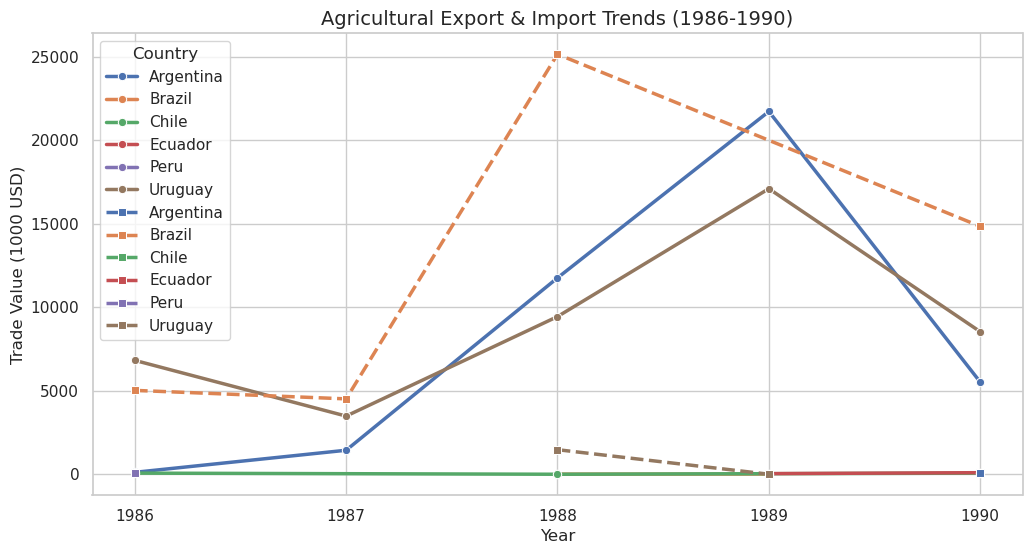

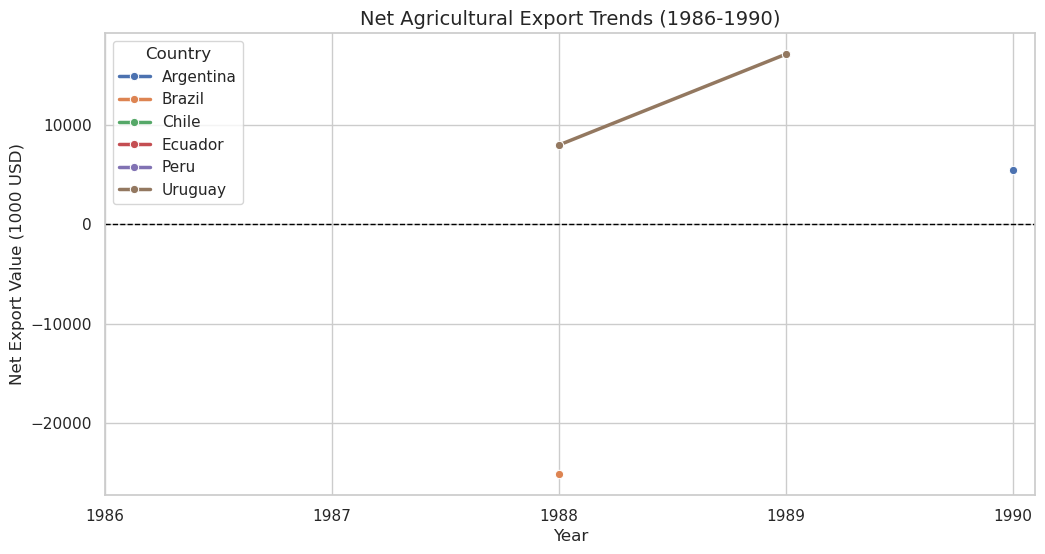

In [33]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Export value", hue="Country", data=df_pivot, marker="o", linewidth=2.5)
sns.lineplot(x="Year", y="Import value", hue="Country", data=df_pivot, marker="s", linestyle="dashed", linewidth=2.5)

plt.title("Agricultural Export & Import Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (1000 USD)")
plt.legend(title="Country")  
plt.xticks(df_pivot["Year"].unique())
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Net_Export", hue="Country", data=df_pivot, marker="o", linewidth=2.5)

plt.title("Net Agricultural Export Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Export Value (1000 USD)")
plt.xticks(df_pivot["Year"].unique())
plt.axhline(0, color="black", linestyle="--", linewidth=1) 
plt.show()


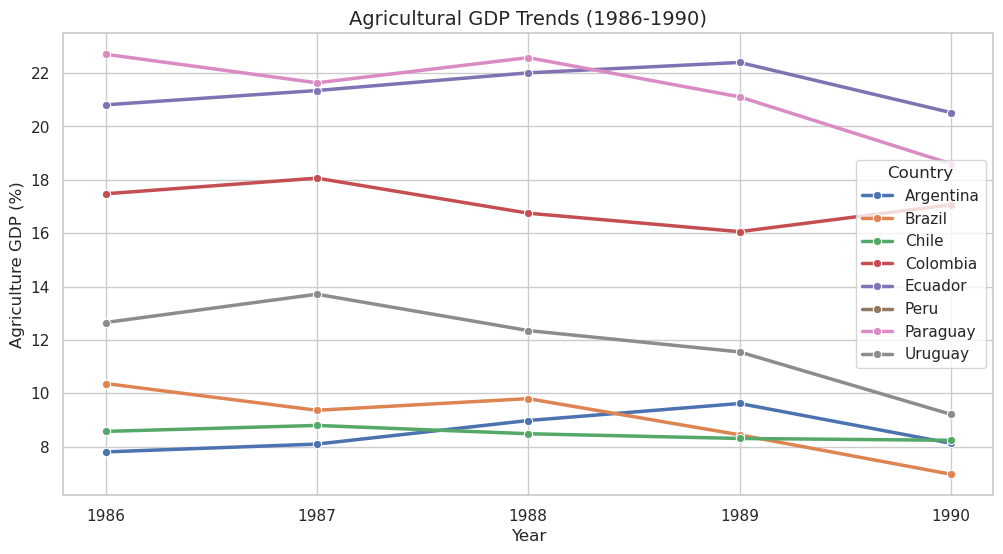

📊 Agricultural GDP Statistics:
      Country   Mean_GDP  Std_Dev_GDP
0  Argentina   8.522474     0.752834
1     Brazil   8.985484     1.330804
2      Chile   8.477295     0.221511
3   Colombia  17.082786     0.755138
4    Ecuador  21.418313     0.789701
5   Paraguay  21.327432     1.661805
6       Peru        NaN          NaN
7    Uruguay  11.894058     1.689509
📈 Agricultural GDP Growth Rate Data:
      Country  Year  Agriculture_GDP  GDP_Growth
0  Argentina  1990         8.123676         NaN
1  Argentina  1989         9.616065   18.370856
2  Argentina  1988         8.977868   -6.636778
3  Argentina  1987         8.094358   -9.840975
4  Argentina  1986         7.800403   -3.631614


/tmp/ipykernel_1103/3374497401.py:31: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  agriculture_gdp["GDP_Growth"] = agriculture_gdp.groupby("Country")["Agriculture_GDP"].pct_change() * 100


In [34]:
target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990

agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))
)

agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Agriculture_GDP", hue="Country", data=agriculture_gdp, marker="o", linewidth=2.5)
plt.title("Agricultural GDP Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Agriculture GDP (%)")
plt.xticks(agriculture_gdp["Year"].unique())  
plt.legend(title="Country")
plt.show()

gdp_stats = agriculture_gdp.groupby("Country")["Agriculture_GDP"].agg(["mean", "std"]).reset_index()
gdp_stats.rename(columns={"mean": "Mean_GDP", "std": "Std_Dev_GDP"}, inplace=True)
print("📊 Agricultural GDP Statistics:\n", gdp_stats)

agriculture_gdp["GDP_Growth"] = agriculture_gdp.groupby("Country")["Agriculture_GDP"].pct_change() * 100
print("📈 Agricultural GDP Growth Rate Data:\n", agriculture_gdp.head())
